# أستكشاف بيانات الملف الأصلي 

# المرحلة التانية: المعالجة

# هندسة سمات: انشاء ميزات جديدة

In [44]:
#invite people for the Kaggle party
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [45]:
#bring in the six packs
BC = pd.read_csv('bc_with_mis_90.csv')

In [46]:
#check the decoration
BC.columns

Index(['Sex', 'Age', 'Adress', 'FBS', 'Urea', 'Creatinin', 'ALB', 'TCa', 'GPT',
       'GOT', 'ALP', 'CA15', 'CEA', 'WBC', 'RBC', 'HGB', 'PLT', 'ESR', 'LDH',
       'Na', 'K', 'CL', 'CLASS'],
      dtype='object')

In [47]:
BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,200.0,23.0,0.8,3.4,1.0,2.0,1.0,124.0,69.12,8.02,3.4,4.60,13.4,500.0,25.0,150.0,145.0,4.50,19.1,0
1,1,53,Sabha,400.0,22.0,0.7,NaN,9.6,3.0,7.0,133.0,51.82,7.91,4.4,5.00,12.5,NaN,15.0,260.0,137.8,4.18,19.1,0
2,1,50,Sabha,450.0,27.0,0.6,3.5,9.3,11.0,17.0,155.0,50.00,8.74,5.1,4.46,12.5,456.0,2.0,169.0,139.2,4.17,16.4,0
3,1,36,Obaree-center,300.0,15.0,1.1,4.2,8.5,13.0,1.0,NaN,40.11,10.34,3.1,4.33,13.8,600.0,15.0,138.0,14.0,4.00,1.1,0
4,1,30,Obaree-center,345.0,2.0,1.0,3.0,8.0,7.0,13.0,125.0,67.63,7.31,4.2,4.13,1.7,543.0,25.0,154.0,136.4,4.60,17.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1,30,Algatroon,70.0,28.0,0.7,5.9,9.5,63.0,23.0,234.0,21.00,1.12,3.9,5.23,11.3,288.0,15.0,254.0,138.7,4.35,103.6,1
2433,1,47,Sabha,98.0,32.0,0.8,10.2,8.8,82.0,23.0,190.0,21.37,2.02,4.8,4.57,13.2,249.0,12.0,254.0,142.3,4.40,102.7,1
2434,1,43,Sabha,76.0,15.0,0.6,11.4,8.1,22.0,15.0,143.0,8.50,0.50,4.4,4.32,11.1,249.0,8.0,254.0,137.8,4.25,110.2,1
2435,1,60,Sabha,120.0,29.0,0.9,10.9,8.2,51.0,17.0,104.0,NaN,NaN,4.5,4.41,12.9,293.0,13.0,254.0,147.5,3.15,107.5,1


In [48]:
numerical_feature_columns = list(BC._get_numeric_data().columns)
numerical_feature_columns

['Sex',
 'Age',
 'FBS',
 'Urea',
 'Creatinin',
 'ALB',
 'TCa',
 'GPT',
 'GOT',
 'ALP',
 'CA15',
 'CEA',
 'WBC',
 'RBC',
 'HGB',
 'PLT',
 'ESR',
 'LDH',
 'Na',
 'K',
 'CL',
 'CLASS']

In [49]:
target = 'CLASS'


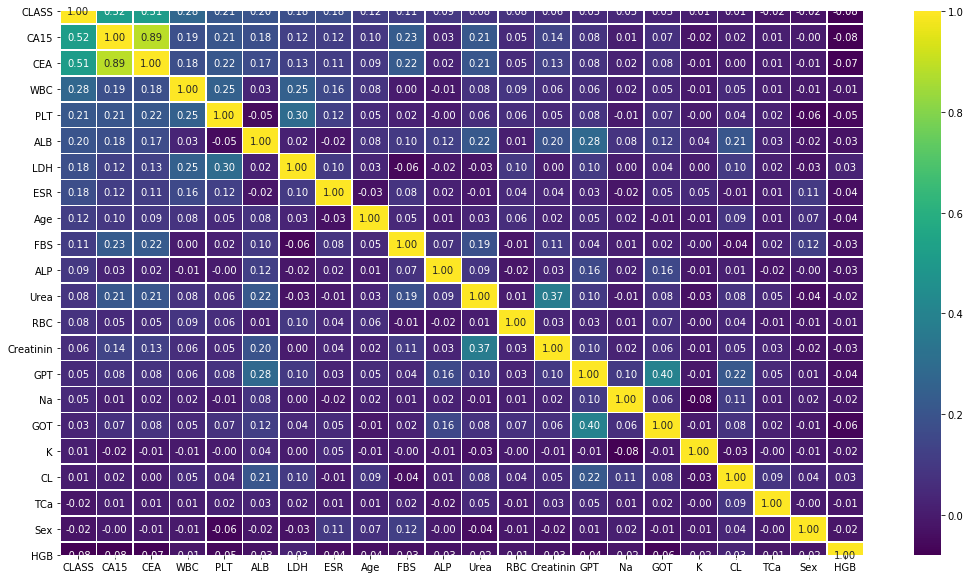

In [50]:
k = 23 #number of variables for heatmap
cols = BC[numerical_feature_columns].corr().nlargest(k, target)[target].index
cm = BC[cols].corr()
f,ax = plt.subplots(figsize=(18, 10))
sns.heatmap(cm, annot=True,cmap = 'viridis', linewidths=.5, fmt= '.2f',ax=ax)

In [51]:
#imputing nan values

BC["FBS"].fillna(BC["FBS"].mean(), inplace=True)
BC["Urea"].fillna(BC["Urea"].mean(), inplace=True)
BC["Creatinin"].fillna(BC["Creatinin"].mean(), inplace=True)
BC["ALB"].fillna(BC["ALB"].mean(), inplace=True)
BC["TCa"].fillna(BC["TCa"].mean(), inplace=True)
BC["GPT"].fillna(BC["GPT"].mean(), inplace=True)
BC["GOT"].fillna(BC["GOT"].mean(), inplace=True)
BC["ALP"].fillna(BC["ALP"].mean(), inplace=True)
BC["WBC"].fillna(BC["WBC"].mean(), inplace=True)
BC["HGB"].fillna(BC["HGB"].mean(), inplace=True)
BC["RBC"].fillna(BC["RBC"].mean(), inplace=True)
BC["PLT"].fillna(BC["PLT"].mean(), inplace=True)
BC["ESR"].fillna(BC["ESR"].mean(), inplace=True)
BC["LDH"].fillna(BC["LDH"].mean(), inplace=True)
BC["Na"].fillna(BC["Na"].mean(), inplace=True)
BC["K"].fillna(BC["K"].mean(), inplace=True)
BC["CL"].fillna(BC["CL"].mean(), inplace=True)
BC["CA15"].fillna(BC["CA15"].mean(), inplace=True)
BC["CEA"].fillna(BC["CEA"].mean(), inplace=True)
BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,200.0,23.0,0.8,3.400000,1.0,2.0,1.0,124.000000,69.120000,8.020000,3.4,4.60,13.4,500.000000,25.0,150.0,145.0,4.50,19.1,0
1,1,53,Sabha,400.0,22.0,0.7,4.461508,9.6,3.0,7.0,133.000000,51.820000,7.910000,4.4,5.00,12.5,283.554362,15.0,260.0,137.8,4.18,19.1,0
2,1,50,Sabha,450.0,27.0,0.6,3.500000,9.3,11.0,17.0,155.000000,50.000000,8.740000,5.1,4.46,12.5,456.000000,2.0,169.0,139.2,4.17,16.4,0
3,1,36,Obaree-center,300.0,15.0,1.1,4.200000,8.5,13.0,1.0,140.701195,40.110000,10.340000,3.1,4.33,13.8,600.000000,15.0,138.0,14.0,4.00,1.1,0
4,1,30,Obaree-center,345.0,2.0,1.0,3.000000,8.0,7.0,13.0,125.000000,67.630000,7.310000,4.2,4.13,1.7,543.000000,25.0,154.0,136.4,4.60,17.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1,30,Algatroon,70.0,28.0,0.7,5.900000,9.5,63.0,23.0,234.000000,21.000000,1.120000,3.9,5.23,11.3,288.000000,15.0,254.0,138.7,4.35,103.6,1
2433,1,47,Sabha,98.0,32.0,0.8,10.200000,8.8,82.0,23.0,190.000000,21.370000,2.020000,4.8,4.57,13.2,249.000000,12.0,254.0,142.3,4.40,102.7,1
2434,1,43,Sabha,76.0,15.0,0.6,11.400000,8.1,22.0,15.0,143.000000,8.500000,0.500000,4.4,4.32,11.1,249.000000,8.0,254.0,137.8,4.25,110.2,1
2435,1,60,Sabha,120.0,29.0,0.9,10.900000,8.2,51.0,17.0,104.000000,30.967314,4.536407,4.5,4.41,12.9,293.000000,13.0,254.0,147.5,3.15,107.5,1


## outlires by Z-score


In [52]:
BC["ZScore_FBS"] = (BC.FBS - BC.FBS.mean())/(BC.FBS.std())
BC["ZScore_Urea"] = (BC.Urea - BC.Urea.mean())/(BC.Urea.std())
BC["ZScore_creatinine"] = (BC.Creatinin - BC.Creatinin.mean())/(BC.Creatinin.std())
BC["ZScore_ALB"] = (BC.ALB - BC.ALB.mean())/(BC.ALB.std())
BC["ZScore_TCa"] = (BC.TCa - BC.TCa.mean())/(BC.TCa.std())
BC["ZScore_GPT"] = (BC.GPT - BC.GPT.mean())/(BC.GPT.std())
BC["ZScore_GOT"] = (BC.GOT - BC.GOT.mean())/(BC.GOT.std())
BC["ZScore_ALP"] = (BC.ALP - BC.ALP.mean())/(BC.ALP.std())
BC["ZScore_CA15"] = (BC.CA15 - BC.CA15.mean())/(BC.CA15.std())
BC["ZScore_CEA"] = (BC.CEA - BC.CEA.mean())/(BC.CEA.std())
BC["ZScore_WBC"] = (BC.WBC - BC.WBC.mean())/(BC.WBC.std())
BC["ZScore_RBC"] = (BC.RBC - BC.RBC.mean())/(BC.RBC.std())
BC["ZScore_HGB"] = (BC.HGB - BC.HGB.mean())/(BC.HGB.std())
BC["ZScore_PLT"] = (BC.PLT - BC.PLT.mean())/(BC.PLT.std())
BC["ZScore_ESR"] = (BC.ESR - BC.ESR.mean())/(BC.ESR.std())
BC["ZScore_LDH"] = (BC.LDH - BC.LDH.mean())/(BC.LDH.std())
BC["ZScore_Na"] = (BC.Na - BC.Na.mean())/(BC.Na.std())
BC["ZScore_CL"] = (BC.CL - BC.CL.mean())/(BC.CL.std())
BC["ZScore_K"] = (BC.K - BC.K.mean())/(BC.K.std())



In [53]:
BC_FBS_outlier_Z = BC[(BC.ZScore_FBS>3) | (BC.ZScore_FBS<-3)]
BC_Urea_outlier_Z = BC[(BC.ZScore_Urea>3) | (BC.ZScore_Urea<-3)]
BC_creatinine_outlier_Z = BC[(BC.ZScore_creatinine>3) | (BC.ZScore_creatinine<-3)]
BC_ALB_outlier_Z = BC[(BC.ZScore_ALB>3) | (BC.ZScore_ALB<-3)]
BC_TCa_outlier_Z = BC[(BC.ZScore_TCa>3) | (BC.ZScore_TCa<-3)]
BC_GPT_outlier_Z = BC[(BC.ZScore_GPT>3) | (BC.ZScore_GPT<-3)]
BC_GOT_outlier_Z = BC[(BC.ZScore_GOT>3) | (BC.ZScore_GOT<-3)]
BC_ALP_outlier_Z = BC[(BC.ZScore_ALP>3) | (BC.ZScore_ALP<-3)]
BC_CA15_outlier_Z = BC[(BC.ZScore_CA15>3) | (BC.ZScore_CA15<-3)]
BC_CEA_outlier_Z = BC[(BC.ZScore_CEA>3) | (BC.ZScore_CEA<-3)]
BC_WBC_outlier_Z = BC[(BC.ZScore_WBC>3) | (BC.ZScore_WBC<-3)]
BC_RBC_outlier_Z = BC[(BC.ZScore_RBC>3) | (BC.ZScore_RBC<-3)]
BC_HGB_outlier_Z = BC[(BC.ZScore_HGB>3) | (BC.ZScore_HGB<-3)]
BC_PLT_outlier_Z = BC[(BC.ZScore_PLT>3) | (BC.ZScore_PLT<-3)]
BC_ESR_outlier_Z = BC[(BC.ZScore_ESR>3) | (BC.ZScore_ESR<-3)]
BC_LDH_outlier_Z = BC[(BC.ZScore_LDH>3) | (BC.ZScore_LDH<-3)]
BC_Na_outlier_Z = BC[(BC.ZScore_Na>3) | (BC.ZScore_Na<-3)]
BC_K_outlier_Z = BC[(BC.ZScore_CL>3) | (BC.ZScore_CL<-3)]
BC_CL_outlier_Z = BC[(BC.ZScore_K>3) | (BC.ZScore_K<-3)]


In [54]:
BC.isnull().sum()

Sex                  0
Age                  0
Adress               0
FBS                  0
Urea                 0
Creatinin            0
ALB                  0
TCa                  0
GPT                  0
GOT                  0
ALP                  0
CA15                 0
CEA                  0
WBC                  0
RBC                  0
HGB                  0
PLT                  0
ESR                  0
LDH                  0
Na                   0
K                    0
CL                   0
CLASS                0
ZScore_FBS           0
ZScore_Urea          0
ZScore_creatinine    0
ZScore_ALB           0
ZScore_TCa           0
ZScore_GPT           0
ZScore_GOT           0
ZScore_ALP           0
ZScore_CA15          0
ZScore_CEA           0
ZScore_WBC           0
ZScore_RBC           0
ZScore_HGB           0
ZScore_PLT           0
ZScore_ESR           0
ZScore_LDH           0
ZScore_Na            0
ZScore_CL            0
ZScore_K             0
dtype: int64

In [55]:
#assigning nan to the outliers

BC['FBS'].values[BC['ZScore_FBS'] > 3] = np.nan
BC['FBS'].values[BC['ZScore_FBS'] < -3] = np.nan

BC['Urea'].values[BC['ZScore_Urea'] > 3] = np.nan
BC['Urea'].values[BC['ZScore_Urea'] < -3] = np.nan

BC['Creatinin'].values[BC['ZScore_creatinine'] > 3] = np.nan
BC['Creatinin'].values[BC['ZScore_creatinine'] < -3] = np.nan

BC['ALB'].values[BC['ZScore_ALB'] > 3] = np.nan
BC['ALB'].values[BC['ZScore_ALB'] < -3] = np.nan

BC['TCa'].values[BC['ZScore_TCa'] > 3] = np.nan
BC['TCa'].values[BC['ZScore_TCa'] < -3] = np.nan

BC['GPT'].values[BC['ZScore_GPT'] > 3] = np.nan
BC['GPT'].values[BC['ZScore_GPT'] < -3] = np.nan

BC['GOT'].values[BC['ZScore_GOT'] > 3] = np.nan
BC['GOT'].values[BC['ZScore_GOT'] < -3] = np.nan

BC['ALP'].values[BC['ZScore_ALP'] > 3] = np.nan
BC['ALP'].values[BC['ZScore_ALP'] < -3] = np.nan

BC['CA15'].values[BC['ZScore_CA15'] > 3] = np.nan
BC['CA15'].values[BC['ZScore_CA15'] < -3] = np.nan

BC['CEA'].values[BC['ZScore_CEA'] > 3] = np.nan
BC['CEA'].values[BC['ZScore_CEA'] < -3] = np.nan

BC['WBC'].values[BC['ZScore_WBC'] > 3] = np.nan
BC['WBC'].values[BC['ZScore_WBC'] < -3] = np.nan

BC['RBC'].values[BC['ZScore_RBC'] > 3] = np.nan
BC['RBC'].values[BC['ZScore_RBC'] < -3] = np.nan

BC['HGB'].values[BC['ZScore_HGB'] > 3] = np.nan
BC['HGB'].values[BC['ZScore_HGB'] < -3] = np.nan

BC['PLT'].values[BC['ZScore_PLT'] > 3] = np.nan
BC['PLT'].values[BC['ZScore_PLT'] < -3] = np.nan

BC['ESR'].values[BC['ZScore_ESR'] > 3] = np.nan
BC['ESR'].values[BC['ZScore_ESR'] < -3] = np.nan

BC['LDH'].values[BC['ZScore_LDH'] > 3] = np.nan
BC['LDH'].values[BC['ZScore_LDH'] < -3] = np.nan

BC['Na'].values[BC['ZScore_Na'] > 3] = np.nan
BC['Na'].values[BC['ZScore_Na'] < -3] = np.nan

BC['CL'].values[BC['ZScore_CL'] > 3] = np.nan
BC['CL'].values[BC['ZScore_CL'] < -3] = np.nan

BC['K'].values[BC['ZScore_K'] > 3] = np.nan
BC['K'].values[BC['ZScore_K'] < -3] = np.nan


In [56]:
BC.drop(["ZScore_FBS","ZScore_Urea","ZScore_creatinine","ZScore_ALB","ZScore_TCa","ZScore_GPT","ZScore_GOT","ZScore_ALP",
        "ZScore_CA15","ZScore_CEA","ZScore_WBC","ZScore_RBC","ZScore_HGB","ZScore_PLT","ZScore_ESR","ZScore_LDH",
        "ZScore_Na","ZScore_CL","ZScore_K"],axis=1,inplace=True)

BC.isnull().sum()


Sex           0
Age           0
Adress        0
FBS          50
Urea         66
Creatinin    27
ALB          60
TCa           8
GPT          61
GOT          43
ALP          28
CA15          3
CEA           1
WBC          13
RBC           4
HGB           3
PLT           3
ESR          30
LDH          12
Na            1
K             8
CL            3
CLASS         0
dtype: int64

In [57]:
#imputing nan values

BC["FBS"].fillna(BC["FBS"].mean(), inplace=True)
BC["Urea"].fillna(BC["Urea"].mean(), inplace=True)
BC["Creatinin"].fillna(BC["Creatinin"].mean(), inplace=True)
BC["ALB"].fillna(BC["ALB"].mean(), inplace=True)
BC["TCa"].fillna(BC["TCa"].mean(), inplace=True)
BC["GPT"].fillna(BC["GPT"].mean(), inplace=True)
BC["GOT"].fillna(BC["GOT"].mean(), inplace=True)
BC["ALP"].fillna(BC["ALP"].mean(), inplace=True)
BC["WBC"].fillna(BC["WBC"].mean(), inplace=True)
BC["HGB"].fillna(BC["HGB"].mean(), inplace=True)
BC["RBC"].fillna(BC["RBC"].mean(), inplace=True)
BC["PLT"].fillna(BC["PLT"].mean(), inplace=True)
BC["ESR"].fillna(BC["ESR"].mean(), inplace=True)
BC["LDH"].fillna(BC["LDH"].mean(), inplace=True)
BC["Na"].fillna(BC["Na"].mean(), inplace=True)
BC["K"].fillna(BC["K"].mean(), inplace=True)
BC["CL"].fillna(BC["CL"].mean(), inplace=True)
BC["CA15"].fillna(BC["CA15"].mean(), inplace=True)
BC["CEA"].fillna(BC["CEA"].mean(), inplace=True)
BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,200.00000,23.0,0.8,3.400000,1.0,2.000000,1.0,124.000000,69.120000,8.020000,3.4,4.60,13.4,500.000000,25.0,150.0,145.0,4.50,19.1,0
1,1,53,Sabha,154.36173,22.0,0.7,4.461508,9.6,3.000000,7.0,133.000000,51.820000,7.910000,4.4,5.00,12.5,283.554362,15.0,260.0,137.8,4.18,19.1,0
2,1,50,Sabha,154.36173,27.0,0.6,3.500000,9.3,11.000000,17.0,155.000000,50.000000,8.740000,5.1,4.46,12.5,456.000000,2.0,169.0,139.2,4.17,16.4,0
3,1,36,Obaree-center,300.00000,15.0,1.1,4.200000,8.5,13.000000,1.0,140.701195,40.110000,10.340000,3.1,4.33,13.8,600.000000,15.0,138.0,14.0,4.00,1.1,0
4,1,30,Obaree-center,345.00000,2.0,1.0,3.000000,8.0,7.000000,13.0,125.000000,67.630000,7.310000,4.2,4.13,1.7,543.000000,25.0,154.0,136.4,4.60,17.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1,30,Algatroon,70.00000,28.0,0.7,5.900000,9.5,13.882247,23.0,234.000000,21.000000,1.120000,3.9,5.23,11.3,288.000000,15.0,254.0,138.7,4.35,103.6,1
2433,1,47,Sabha,98.00000,32.0,0.8,10.200000,8.8,13.882247,23.0,190.000000,21.370000,2.020000,4.8,4.57,13.2,249.000000,12.0,254.0,142.3,4.40,102.7,1
2434,1,43,Sabha,76.00000,15.0,0.6,11.400000,8.1,22.000000,15.0,143.000000,8.500000,0.500000,4.4,4.32,11.1,249.000000,8.0,254.0,137.8,4.25,110.2,1
2435,1,60,Sabha,120.00000,29.0,0.9,10.900000,8.2,51.000000,17.0,104.000000,30.967314,4.536407,4.5,4.41,12.9,293.000000,13.0,254.0,147.5,3.15,107.5,1


In [58]:
numerical_feature_columns = list(BC._get_numeric_data().columns)
numerical_feature_columns

['Sex',
 'Age',
 'FBS',
 'Urea',
 'Creatinin',
 'ALB',
 'TCa',
 'GPT',
 'GOT',
 'ALP',
 'CA15',
 'CEA',
 'WBC',
 'RBC',
 'HGB',
 'PLT',
 'ESR',
 'LDH',
 'Na',
 'K',
 'CL',
 'CLASS']

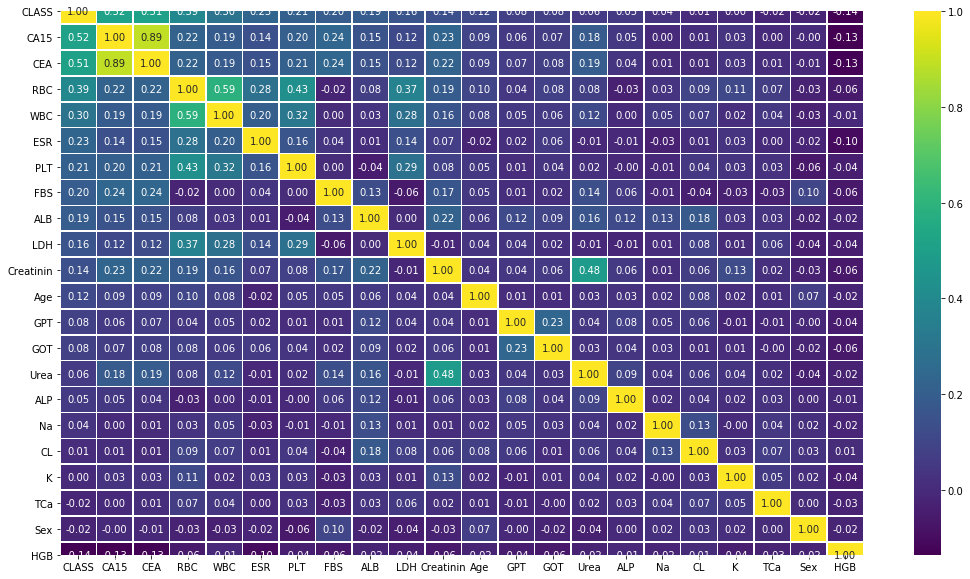

In [59]:
k = 23 #number of variables for heatmap
cols = BC[numerical_feature_columns].corr().nlargest(k, target)[target].index
cm = BC[cols].corr()
f,ax = plt.subplots(figsize=(18, 10))
sns.heatmap(cm, annot=True,cmap = 'viridis', linewidths=.5, fmt= '.2f',ax=ax)

In [60]:
BC['CLASS'] = BC['CLASS'].map({0:"Benine", 1:"Mealigent"})

In [61]:

BC.loc[(BC['Urea'] >= 50) & (BC['Creatinin'] >= 1.4), 'Kidney_failure'] = "yes"
BC.loc[(BC['Urea'] <= 50) & (BC['Creatinin'] <= 1.4), 'Kidney_failure'] = "No"



BC.loc[(BC['GPT'] >= 50) & (BC['GOT'] >= 35), 'hepatitis'] = "yes"
BC.loc[(BC['GPT'] <= 50) & (BC['GOT'] <= 35), 'hepatitis'] = "No"

BC.loc[(BC['FBS'] >= 150), 'diabetic'] = "yes"
BC.loc[(BC['FBS'] <= 150), 'diabetic'] = "No"




In [62]:
BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS,Kidney_failure,hepatitis,diabetic
0,1,60,Tragan,200.00000,23.0,0.8,3.400000,1.0,2.000000,1.0,124.000000,69.120000,8.020000,3.4,4.60,13.4,500.000000,25.0,150.0,145.0,4.50,19.1,Benine,No,No,yes
1,1,53,Sabha,154.36173,22.0,0.7,4.461508,9.6,3.000000,7.0,133.000000,51.820000,7.910000,4.4,5.00,12.5,283.554362,15.0,260.0,137.8,4.18,19.1,Benine,No,No,yes
2,1,50,Sabha,154.36173,27.0,0.6,3.500000,9.3,11.000000,17.0,155.000000,50.000000,8.740000,5.1,4.46,12.5,456.000000,2.0,169.0,139.2,4.17,16.4,Benine,No,No,yes
3,1,36,Obaree-center,300.00000,15.0,1.1,4.200000,8.5,13.000000,1.0,140.701195,40.110000,10.340000,3.1,4.33,13.8,600.000000,15.0,138.0,14.0,4.00,1.1,Benine,No,No,yes
4,1,30,Obaree-center,345.00000,2.0,1.0,3.000000,8.0,7.000000,13.0,125.000000,67.630000,7.310000,4.2,4.13,1.7,543.000000,25.0,154.0,136.4,4.60,17.1,Benine,No,No,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1,30,Algatroon,70.00000,28.0,0.7,5.900000,9.5,13.882247,23.0,234.000000,21.000000,1.120000,3.9,5.23,11.3,288.000000,15.0,254.0,138.7,4.35,103.6,Mealigent,No,No,No
2433,1,47,Sabha,98.00000,32.0,0.8,10.200000,8.8,13.882247,23.0,190.000000,21.370000,2.020000,4.8,4.57,13.2,249.000000,12.0,254.0,142.3,4.40,102.7,Mealigent,No,No,No
2434,1,43,Sabha,76.00000,15.0,0.6,11.400000,8.1,22.000000,15.0,143.000000,8.500000,0.500000,4.4,4.32,11.1,249.000000,8.0,254.0,137.8,4.25,110.2,Mealigent,No,No,No
2435,1,60,Sabha,120.00000,29.0,0.9,10.900000,8.2,51.000000,17.0,104.000000,30.967314,4.536407,4.5,4.41,12.9,293.000000,13.0,254.0,147.5,3.15,107.5,Mealigent,No,NaN,No


BC.groupby("Kidney_failure").agg({"CLASS": "mean"})

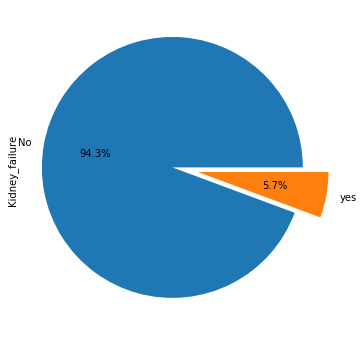

In [63]:
BC.Kidney_failure.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',figsize=(8,6))

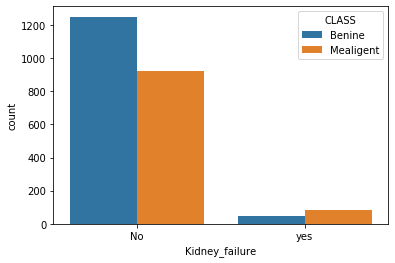

In [64]:
sns.countplot(x="Kidney_failure", hue="CLASS", data=BC);

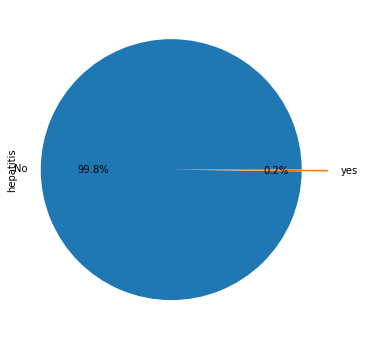

In [65]:
BC.hepatitis.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',figsize=(8,6))

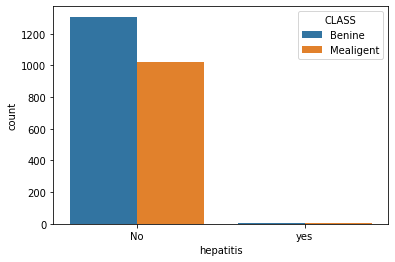

In [66]:
sns.countplot(x="hepatitis", hue="CLASS", data=BC);

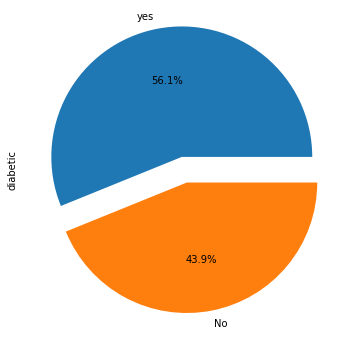

In [67]:
BC.diabetic.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',figsize=(8,6))

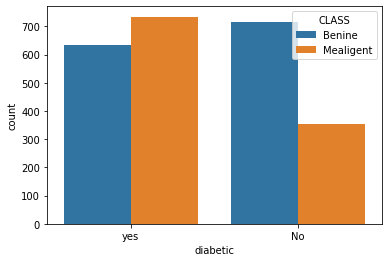

In [68]:
sns.countplot(x="diabetic", hue="CLASS", data=BC);

In [69]:
BC=BC.drop(["Na","CL","K"],axis=1)

In [70]:
numerical_feature_columns = list(BC._get_numeric_data().columns)
numerical_feature_columns

['Sex',
 'Age',
 'FBS',
 'Urea',
 'Creatinin',
 'ALB',
 'TCa',
 'GPT',
 'GOT',
 'ALP',
 'CA15',
 'CEA',
 'WBC',
 'RBC',
 'HGB',
 'PLT',
 'ESR',
 'LDH']

In [71]:
BC['CLASS'] = BC['CLASS'].map({"Benine":0,"Mealigent":1})

In [80]:
target = 'CLASS'


In [81]:
BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,CLASS,Kidney_failure,hepatitis,diabetic
0,1,60,Tragan,200.00000,23.0,0.8,3.400000,1.0,2.000000,1.0,124.000000,69.120000,8.020000,3.4,4.60,13.4,500.000000,25.0,150.0,0,No,No,yes
1,1,53,Sabha,154.36173,22.0,0.7,4.461508,9.6,3.000000,7.0,133.000000,51.820000,7.910000,4.4,5.00,12.5,283.554362,15.0,260.0,0,No,No,yes
2,1,50,Sabha,154.36173,27.0,0.6,3.500000,9.3,11.000000,17.0,155.000000,50.000000,8.740000,5.1,4.46,12.5,456.000000,2.0,169.0,0,No,No,yes
3,1,36,Obaree-center,300.00000,15.0,1.1,4.200000,8.5,13.000000,1.0,140.701195,40.110000,10.340000,3.1,4.33,13.8,600.000000,15.0,138.0,0,No,No,yes
4,1,30,Obaree-center,345.00000,2.0,1.0,3.000000,8.0,7.000000,13.0,125.000000,67.630000,7.310000,4.2,4.13,1.7,543.000000,25.0,154.0,0,No,No,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1,30,Algatroon,70.00000,28.0,0.7,5.900000,9.5,13.882247,23.0,234.000000,21.000000,1.120000,3.9,5.23,11.3,288.000000,15.0,254.0,1,No,No,No
2433,1,47,Sabha,98.00000,32.0,0.8,10.200000,8.8,13.882247,23.0,190.000000,21.370000,2.020000,4.8,4.57,13.2,249.000000,12.0,254.0,1,No,No,No
2434,1,43,Sabha,76.00000,15.0,0.6,11.400000,8.1,22.000000,15.0,143.000000,8.500000,0.500000,4.4,4.32,11.1,249.000000,8.0,254.0,1,No,No,No
2435,1,60,Sabha,120.00000,29.0,0.9,10.900000,8.2,51.000000,17.0,104.000000,30.967314,4.536407,4.5,4.41,12.9,293.000000,13.0,254.0,1,No,NaN,No


In [ ]:
k = 23 #number of variables for heatmap

cols = BC[numerical_feature_columns].corr().nlargest(k, target)[target].index
cm = BC[cols].corr()
f,ax = plt.subplots(figsize=(18, 10))
sns.heatmap(cm, annot=True,cmap = 'viridis', linewidths=.5, fmt= '.2f',ax=ax)

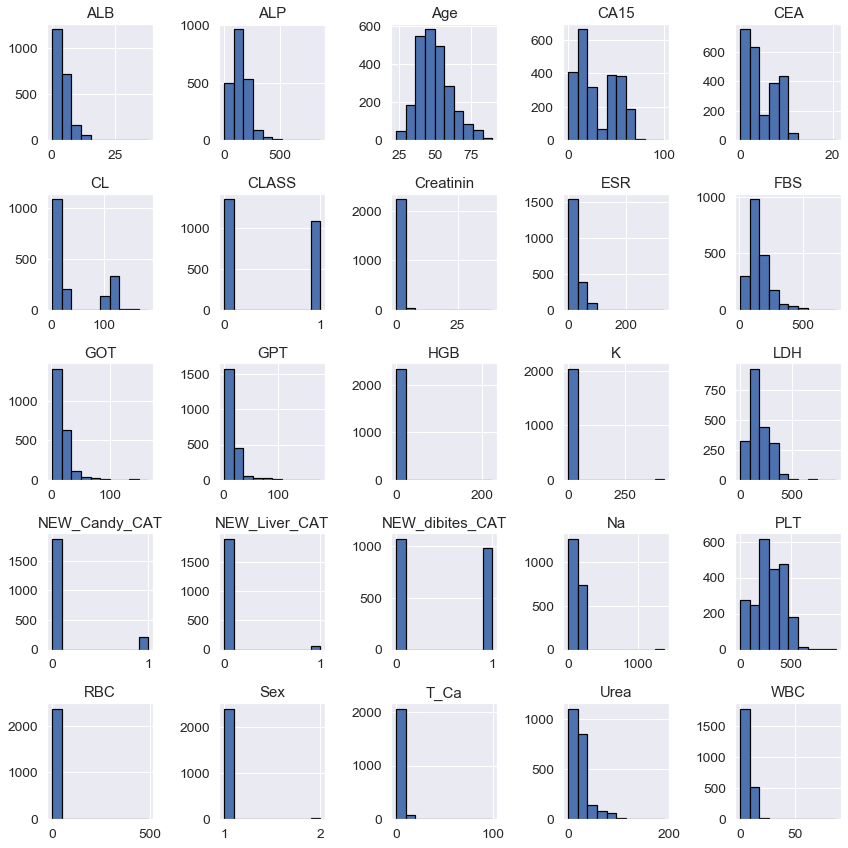

In [34]:
df_train.hist(figsize=(12,12), edgecolor='black', linewidth=1.2)
plt.tight_layout( True )
plt.show()

In [ ]:
test_stat, pvalue = proportions_ztest(count=[df_train.loc[df_train["NEW_Candy_CAT"] == 1, "CLASS"].sum(),
                                             df_train.loc[df_train["NEW_Candy_CAT"] == 0, "CLASS"].sum()],

                                      nobs=[df_train.loc[df_train["NEW_Candy_CAT"] == 1, "CLASS"].shape[0],
                                            df_train.loc[df_train["NEW_Candy_CAT"] == 0, "CLASS"].shape[0]])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

# Ho rejected. That means, there is no difference between the cabin breakdown for Survived target as statistically

In [6]:
df_train

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS,NEW_Candy_CAT,NEW_Liver_CAT,NEW_dibites_CAT
0,1,60,Tragan,200.0,23.0,0.8,3.4,1.0,2.0,1.0,124.0,69.12,8.02,3.4,4.60,13.4,500.0,25.0,150.0,145.0,4.50,19.1,0,0.0,0.0,1.0
1,1,53,Sabha,400.0,22.0,0.7,NaN,9.6,3.0,7.0,133.0,51.82,7.91,4.4,5.00,12.5,NaN,15.0,260.0,137.8,4.18,19.1,0,0.0,0.0,1.0
2,1,50,Sabha,450.0,27.0,0.6,3.5,9.3,11.0,17.0,155.0,50.00,8.74,5.1,4.46,12.5,456.0,2.0,169.0,139.2,4.17,16.4,0,0.0,0.0,1.0
3,1,36,Obaree-center,300.0,15.0,1.1,4.2,8.5,13.0,1.0,NaN,40.11,10.34,3.1,4.33,13.8,600.0,15.0,138.0,14.0,4.00,1.1,0,0.0,0.0,1.0
4,1,30,Obaree-center,345.0,2.0,1.0,3.0,8.0,7.0,13.0,125.0,67.63,7.31,4.2,4.13,1.7,543.0,25.0,154.0,136.4,4.60,17.1,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1,30,Algatroon,70.0,28.0,0.7,5.9,9.5,63.0,23.0,234.0,21.00,1.12,3.9,5.23,11.3,288.0,15.0,254.0,138.7,4.35,103.6,1,0.0,NaN,0.0
2433,1,47,Sabha,98.0,32.0,0.8,10.2,8.8,82.0,23.0,190.0,21.37,2.02,4.8,4.57,13.2,249.0,12.0,254.0,142.3,4.40,102.7,1,0.0,NaN,0.0
2434,1,43,Sabha,76.0,15.0,0.6,11.4,8.1,22.0,15.0,143.0,8.50,0.50,4.4,4.32,11.1,249.0,8.0,254.0,137.8,4.25,110.2,1,0.0,0.0,0.0
2435,1,60,Sabha,120.0,29.0,0.9,10.9,8.2,51.0,17.0,104.0,NaN,NaN,4.5,4.41,12.9,293.0,13.0,254.0,147.5,3.15,107.5,1,0.0,NaN,0.0


### تحليل السمات بلأيحاد العلاقة بين المتعيرات المرتبطة بناء علي الوصف الأحصائي (أكبر قيمة لسمة)

In [5]:
#descriptive statistics summary
df_train['CEA'].describe()

count    2435.000000
mean        4.536407
std         3.442541
min         0.010000
25%         1.510000
50%         3.120000
75%         8.070000
max        20.830000
Name: CEA, dtype: float64

## *'Very well... It seems that your minimum price is larger than zero. Excellent! You don't have one of those personal traits that would destroy my model! Do you have any picture that you can send me? I don't know... like, you in the beach... or maybe a selfie in the gym?'*

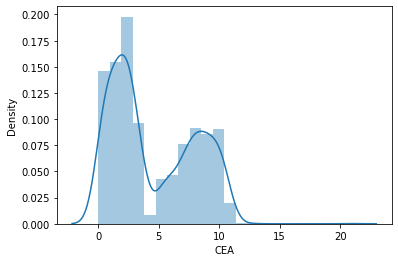

In [6]:

#histogram
sns.distplot(df_train['CEA']);

In [7]:
#skewness and kurtosis
print("Skewness: %f" % df_train['CEA'].skew())
print("Kurtosis: %f" % df_train['CEA'].kurt())

Skewness: 0.420498
Kurtosis: -1.191579


### وفقا لسابق يتم معرفة اللأرتباطات بين السمات

### Relationship with numerical variables

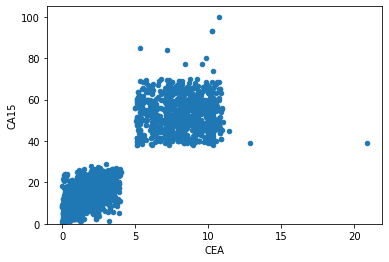

In [8]:
#scatter plot grlivarea/saleprice
var = 'CEA'
data = pd.concat([df_train['CA15'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='CA15', ylim=(0,105));

In [9]:
#descriptive statistics summary
df_train['GOT'].describe()

count    2202.000000
mean       17.179609
std        14.613040
min         1.000000
25%         9.000000
50%        15.000000
75%        22.000000
max       164.000000
Name: GOT, dtype: float64

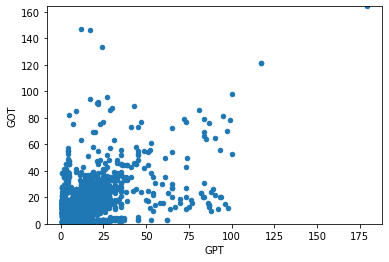

In [10]:
#scatter plot totalbsmtsf/saleprice
var = 'GPT'
data = pd.concat([df_train['GOT'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='GOT', ylim=(0,164));

In [11]:
#descriptive statistics summary
df_train['Urea'].describe()

count    2275.00000
mean       24.62444
std        20.22257
min         0.50000
25%        14.00000
50%        21.00000
75%        29.00000
max       191.00000
Name: Urea, dtype: float64

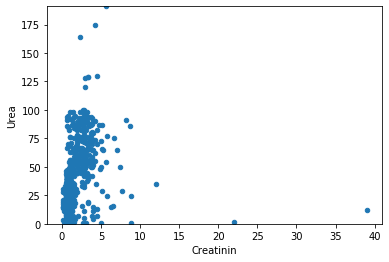

In [12]:
#scatter plot totalbsmtsf/saleprice
var = 'Creatinin'
data = pd.concat([df_train['Urea'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='Urea', ylim=(0,191));

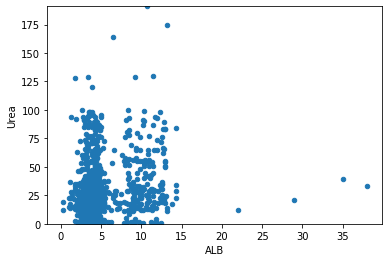

In [13]:
#scatter plot totalbsmtsf/saleprice
var = 'ALB'
data = pd.concat([df_train['Urea'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='Urea', ylim=(0,191));

In [14]:
#descriptive statistics summary
df_train['FBS'].describe()

count    2048.000000
mean      160.677246
std        83.951552
min        11.000000
25%        99.000000
50%       145.000000
75%       200.000000
max       764.000000
Name: FBS, dtype: float64

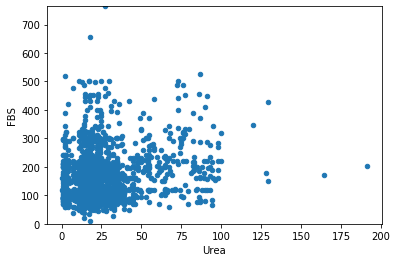

In [15]:
#scatter plot totalbsmtsf/saleprice
var = 'Urea'
data = pd.concat([df_train['FBS'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='FBS', ylim=(0,764));

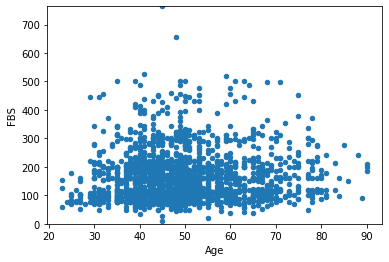

In [16]:
#scatter plot totalbsmtsf/saleprice
var = 'Age'
data = pd.concat([df_train['FBS'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='FBS', ylim=(0,764));

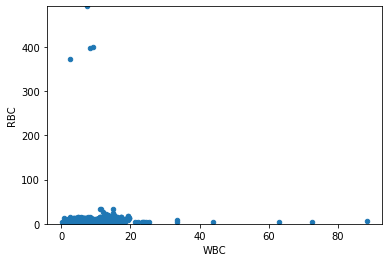

In [19]:
#scatter plot totalbsmtsf/saleprice
var = 'WBC'
data = pd.concat([df_train['RBC'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='RBC', ylim=(0,492));

In [20]:
#descriptive statistics summary
df_train['RBC'].describe()

count    2369.000000
mean        6.519126
std        17.246446
min         0.690000
25%         4.110000
50%         4.450000
75%         5.170000
max       492.000000
Name: RBC, dtype: float64

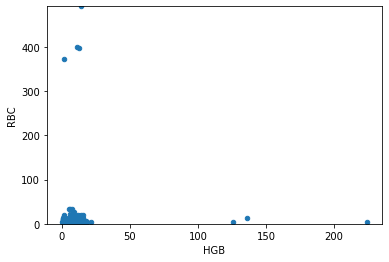

In [21]:
#scatter plot totalbsmtsf/saleprice
var = 'HGB'
data = pd.concat([df_train['RBC'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='RBC', ylim=(0,492));

### تحليل سمة السكن بشكل أكثر تفصيلي وتحديد معدل الامراض في أفراد العينة ووفقا لمناطقهم السكنية

In [7]:
df_train['Adress'] = df_train['Adress'].replace(["Tripoli", "Algofra", "Benwalid", "Temcian","Alzwia-Algrbia", "Tegee", "Alagialt", "BenGawoad", 
         "Agdabia", "Zwoarha", "ALzentan", "Graian", "Benghazi", "Subrath"], 'Other')

df_train['Adress'] = df_train['Adress'].replace(["Sabha","sabha", "Alzeegan"], 'Sabha')
df_train['Adress'] = df_train['Adress'].replace(["Obaree-center","GaberOan","Gath"], 'Obaree')
df_train['Adress'] = df_train['Adress'].replace(["Morzek","Zoiwela","Godoha","Algatroon","Magdool","Wade-atebah","OmAlrianb","Temaciha","Tragan"], 'Morzek')

df_train["Adress"].unique()

array(['Morzek', 'Sabha', 'Obaree', 'Alchate', 'Other'], dtype=object)

### Relationship with categorical features

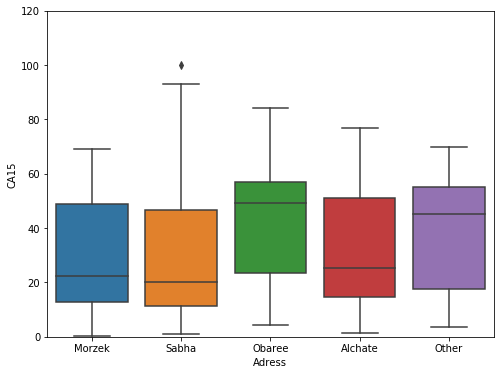

In [15]:
#box plot overallqual/saleprice
var = 'Adress'
data = pd.concat([df_train['CA15'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="CA15", data=data)

fig.axis(ymin=0, ymax=120);

*Like all the pretty girls, 'SalePrice' enjoys 'OverallQual'. Note to self: consider whether McDonald's is suitable for the first date.*

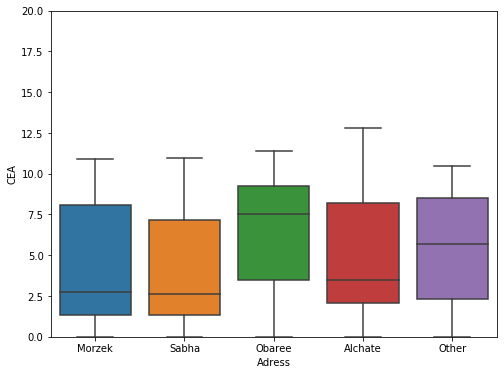

In [24]:
#box plot overallqual/saleprice
var = 'Adress'
data = pd.concat([df_train['CEA'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="CEA", data=data)
fig.axis(ymin=0, ymax=20);

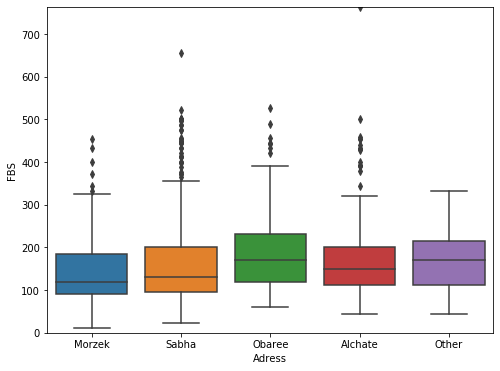

In [25]:
#box plot overallqual/saleprice
var = 'Adress'
data = pd.concat([df_train['FBS'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="FBS", data=data)
fig.axis(ymin=0, ymax=764);

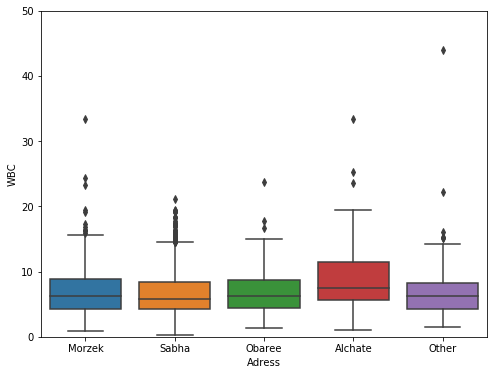

In [26]:
#box plot overallqual/saleprice
var = 'Adress'
data = pd.concat([df_train['WBC'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="WBC", data=data)
fig.axis(ymin=0, ymax=50);

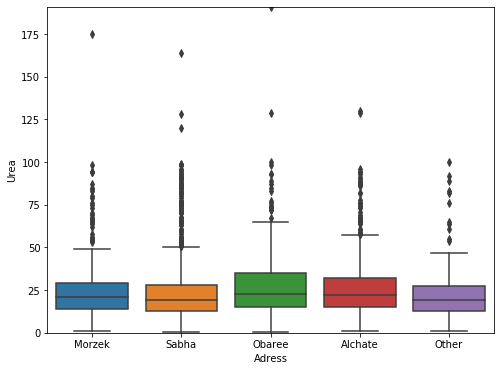

In [27]:
#box plot overallqual/saleprice
var = 'Adress'
data = pd.concat([df_train['Urea'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Urea", data=data)
fig.axis(ymin=0, ymax=191);

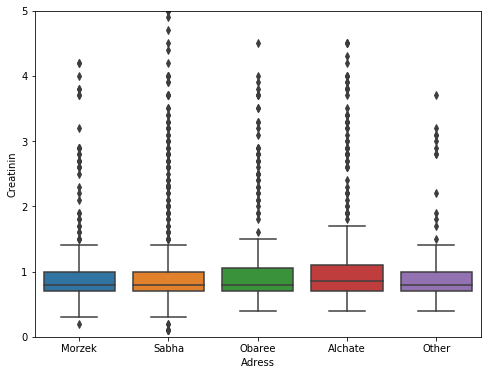

In [28]:
#box plot overallqual/saleprice
var = 'Adress'
data = pd.concat([df_train['Creatinin'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Creatinin", data=data)
fig.axis(ymin=0, ymax=5);

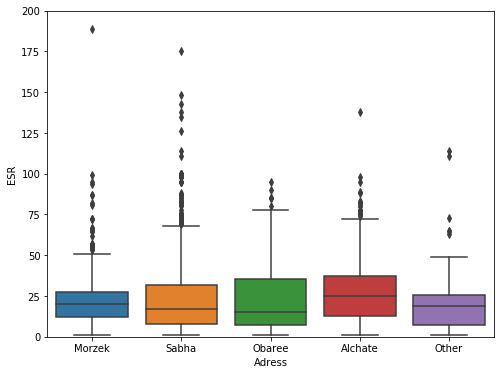

In [29]:
#box plot overallqual/saleprice
var = 'Adress'
data = pd.concat([df_train['ESR'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="ESR", data=data)
fig.axis(ymin=0, ymax=200);

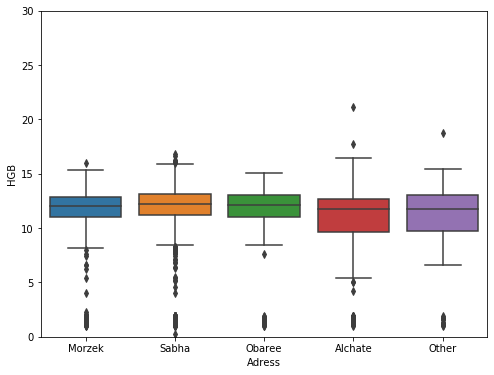

In [30]:
#box plot overallqual/saleprice
var = 'Adress'
data = pd.concat([df_train['HGB'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="HGB", data=data)
fig.axis(ymin=0, ymax=30);

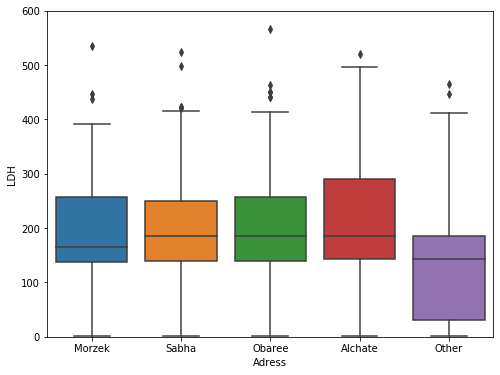

In [31]:
#box plot overallqual/saleprice
var = 'Adress'
data = pd.concat([df_train['LDH'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="LDH", data=data)
fig.axis(ymin=0, ymax=600);

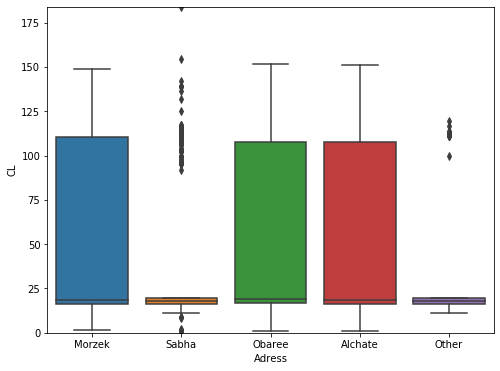

In [32]:
#box plot overallqual/saleprice
var = 'Adress'
data = pd.concat([df_train['CL'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="CL", data=data)
fig.axis(ymin=0, ymax=184);

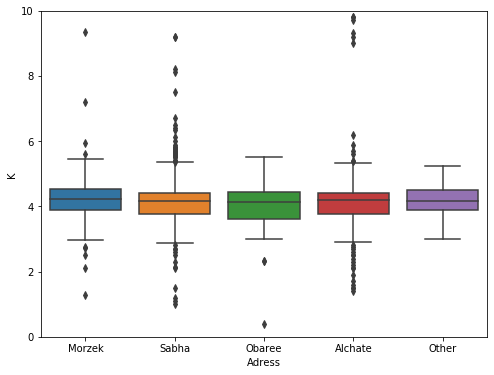

In [33]:
#box plot overallqual/saleprice
var = 'Adress'
data = pd.concat([df_train['K'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="K", data=data)
fig.axis(ymin=0, ymax=10);

### تأكيد العلافات السابفة بين المتغيرات بواسطة معامل بيرسون

#### Correlation matrix (heatmap style)

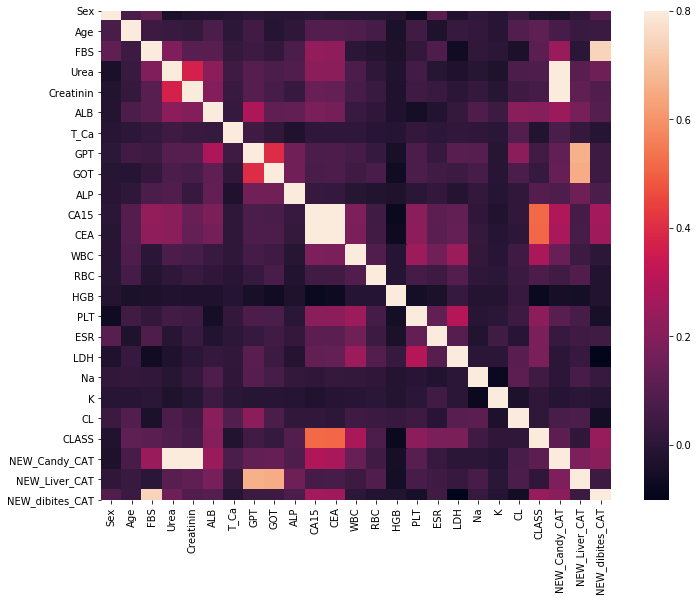

In [7]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

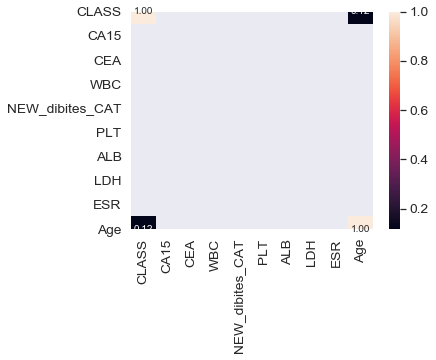

In [8]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'CLASS')['CLASS'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

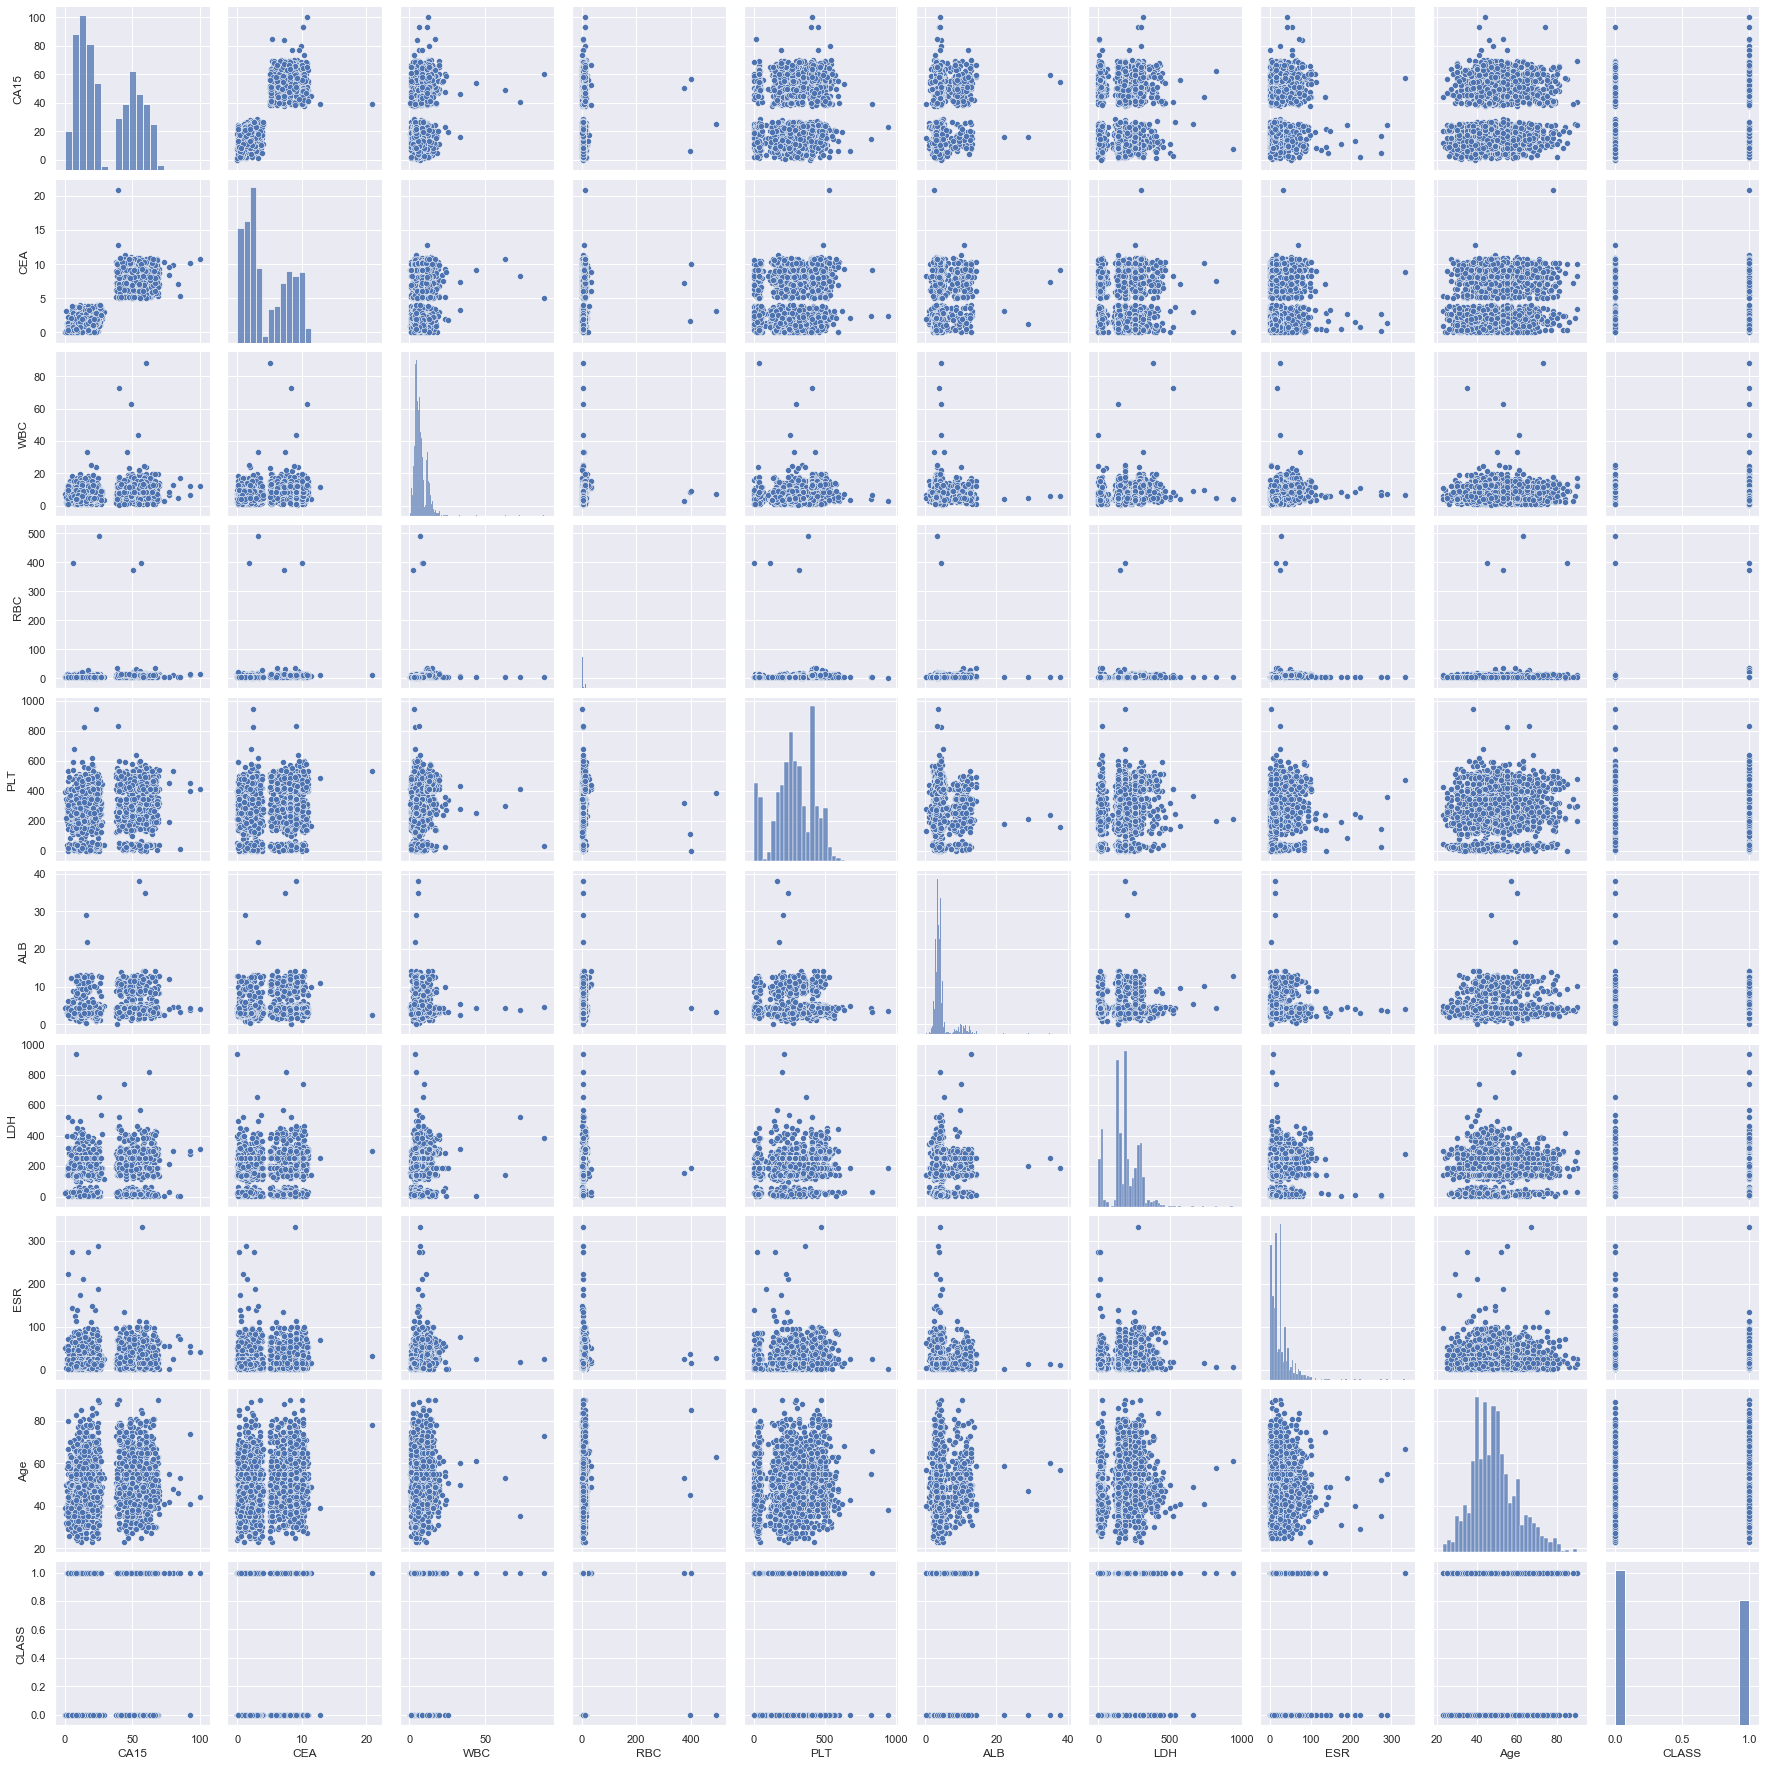

In [37]:
#scatterplot
sns.set()
cols = ['CA15', 'CEA', 'WBC', 'RBC', 'PLT', 'ALB', 'LDH',"ESR","Age","CLASS"]
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

### معرفة النسبة المئوبة للقيم المفقودة في سمات الهينة ووضع عتبة أكثر من 15 في المية أحذف العمود

# 4. Missing data

Important questions when thinking about missing data:

* How prevalent is the missing data?
* Is missing data random or does it have a pattern?

The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. This can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hidding an inconvenient truth.

In [38]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
CL,662,0.271645
Na,426,0.174805
K,398,0.163316
FBS,389,0.159622
ESR,388,0.159212
LDH,385,0.157981
ALP,311,0.127616
GPT,297,0.121871
T_Ca,295,0.121050
ALB,289,0.118588


In [39]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Percent'] > 0.15]).index,1)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

311

In [40]:
df_train

,Sex,Age,Adress,Urea,Creatinin,ALB,T_Ca,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,CLASS
0,1,60,Morzek,23.0,0.8,3.4,1.0,2.0,1.0,124.0,69.12,8.02,3.4,4.60,13.4,500.0,0
1,1,53,Sabha,22.0,0.7,NaN,9.6,3.0,7.0,133.0,51.82,7.91,4.4,5.00,12.5,NaN,0
2,1,50,Sabha,27.0,0.6,3.5,9.3,11.0,17.0,155.0,50.00,8.74,5.1,4.46,12.5,456.0,0
3,1,36,Obaree,15.0,1.1,4.2,8.5,13.0,1.0,NaN,40.11,10.34,3.1,4.33,13.8,600.0,0
4,1,30,Obaree,2.0,1.0,3.0,8.0,7.0,13.0,125.0,67.63,7.31,4.2,4.13,1.7,543.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1,30,Morzek,28.0,0.7,5.9,9.5,63.0,23.0,234.0,21.00,1.12,3.9,5.23,11.3,288.0,1
2433,1,47,Sabha,32.0,0.8,10.2,8.8,82.0,23.0,190.0,21.37,2.02,4.8,4.57,13.2,249.0,1
2434,1,43,Sabha,15.0,0.6,11.4,8.1,22.0,15.0,143.0,8.50,0.50,4.4,4.32,11.1,249.0,1
2435,1,60,Sabha,29.0,0.9,10.9,8.2,51.0,17.0,104.0,NaN,NaN,4.5,4.41,12.9,293.0,1


### الفيم المتطرفة وعلي أي أساس تتم معالجتها
### موضح طرقة بلأن تقوم بحذف الأندكس مباشرة للفيمة التي تراها شادة

# Out liars!

Outliers is also something that we should be aware of. Why? Because outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

Outliers is a complex subject and it deserves more attention. Here, we'll just do a quick analysis through the standard deviation of 'SalePrice' and a set of scatter plots.

### Univariate analysis

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

In [41]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['CA15'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.50769453]
 [-1.47277748]
 [-1.46736779]
 [-1.46540064]
 [-1.46294169]
 [-1.4624499 ]
 [-1.46195811]
 [-1.45802379]
 [-1.45163053]
 [-1.44867979]]

outer range (high) of the distribution:
[[2.26383917]
 [2.26974065]
 [2.41137603]
 [2.60809183]
 [2.66317225]
 [3.05709565]
 [3.05709565]
 [3.39495503]
 [       nan]
 [       nan]]


How 'SalePrice' looks with her new clothes:

* Low range values are similar and not too far from 0.
* High range values are far from 0 and the 7.something values are really out of range.

For now, we'll not consider any of these values as an outlier but we should be careful with those two 7.something values.

### Bivariate analysis

We already know the following scatter plots by heart. However, when we look to things from a new perspective, there's always something to discover. As Alan Kay said, 'a change in perspective is worth 80 IQ points'.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


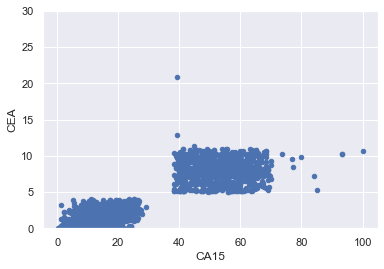

In [42]:
#bivariate analysis saleprice/grlivarea
var = 'CA15'
data = pd.concat([df_train['CEA'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='CEA', ylim=(0,30));

What has been revealed:

* The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that these two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.
* The two observations in the top of the plot are those 7.something observations that we said we should be careful about. They look like two special cases, however they seem to be following the trend. For that reason, we will keep them.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


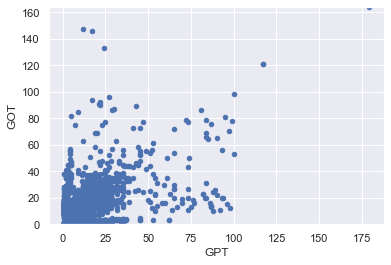

In [43]:
#bivariate analysis saleprice/grlivarea
var = 'GPT'
data = pd.concat([df_train['GOT'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='GOT', ylim=(0,164));

We can feel tempted to eliminate some observations (e.g. TotalBsmtSF > 3000) but I suppose it's not worth it. We can live with that, so we'll not do anything.

### أستخدتم اللوغارتيمات للتنعيم
### التقنية الاتية وضح طريفة لعمل ترانسفورميشن للبيانات بأستحدام طريفة التنعيم

# 5. Getting hard core

### In the search for normality

The point here is to test 'SalePrice' in a very lean way. We'll do this paying attention to:

* <b>Histogram</b> - Kurtosis and skewness.
* <b>Normal probability plot</b> - Data distribution should closely follow the diagonal that represents the normal distribution.

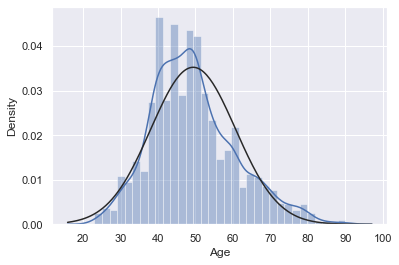

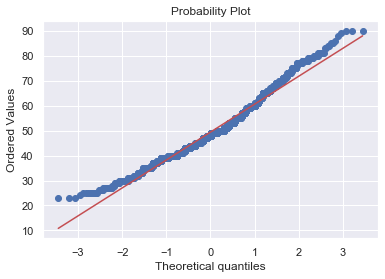

In [44]:
#histogram and normal probability plot
sns.distplot(df_train['Age'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Age'], plot=plt)

Ok, 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.

But everything's not lost. A simple data transformation can solve the problem. This is one of the awesome things you can learn in statistical books: in case of positive skewness, log transformations usually works well. When I discovered this, I felt like an Hogwarts' student discovering a new cool spell.

*Avada kedavra!*

In [45]:
#applying log transformation
df_train['Age'] = np.log(df_train['Age'])

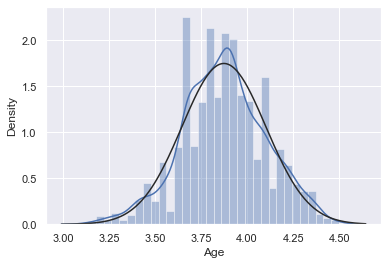

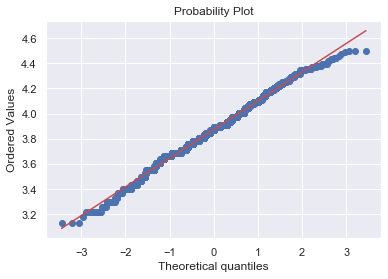

In [46]:
#transformed histogram and normal probability plot
sns.distplot(df_train['Age'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Age'], plot=plt)

In [47]:
df_train['Age']

0       4.094345
1       3.970292
2       3.912023
3       3.583519
4       3.401197
          ...   
2432    3.401197
2433    3.850148
2434    3.761200
2435    4.094345
2436    4.219508
Name: Age, Length: 2437, dtype: float64

Done! Let's check what's going on with 'GrLivArea'.

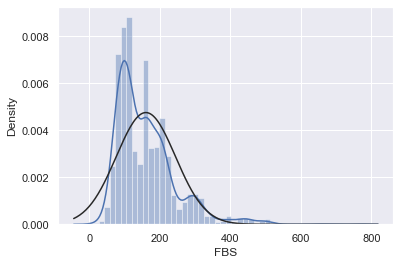

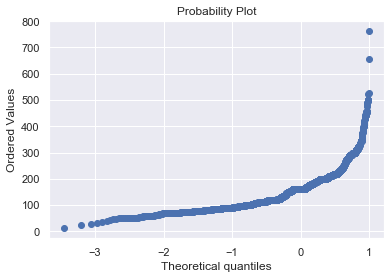

In [51]:
#histogram and normal probability plot
sns.distplot(df_train['FBS'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['FBS'], plot=plt)

Tastes like skewness... *Avada kedavra!*

In [52]:
#data transformation
df_train['FBS'] = np.log(df_train['FBS'])

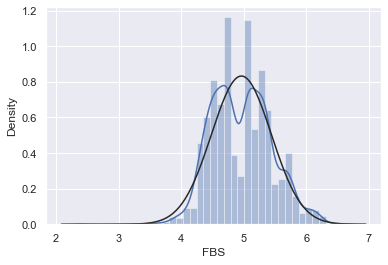

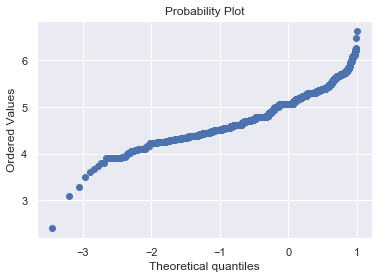

In [53]:
#transformed histogram and normal probability plot
sns.distplot(df_train['FBS'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['FBS'], plot=plt)

Next, please...

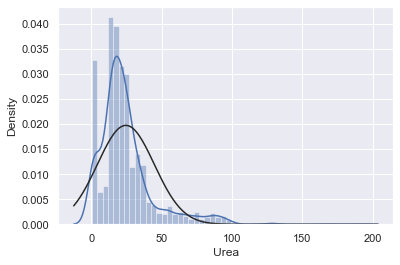

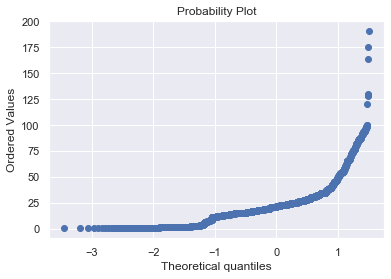

In [54]:
#histogram and normal probability plot
sns.distplot(df_train['Urea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Urea'], plot=plt)

In [55]:
#data transformation
df_train['Urea'] = np.log(df_train['Urea'])

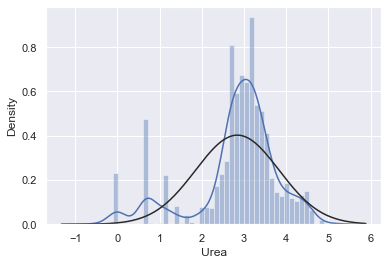

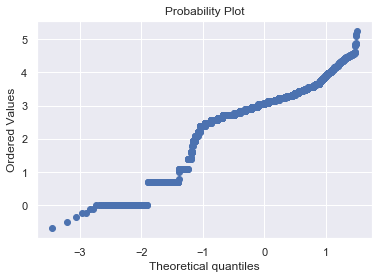

In [56]:
#transformed histogram and normal probability plot
sns.distplot(df_train['Urea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Urea'], plot=plt)

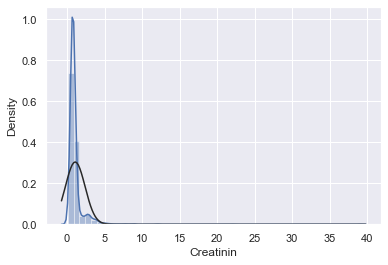

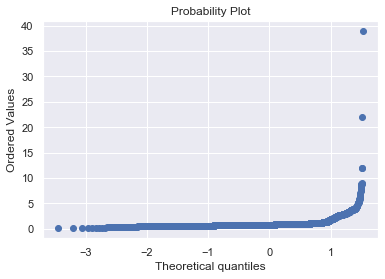

In [57]:
#histogram and normal probability plot
sns.distplot(df_train['Creatinin'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Creatinin'], plot=plt)

In [58]:
#data transformation
df_train['Creatinin'] = np.log(df_train['Creatinin'])

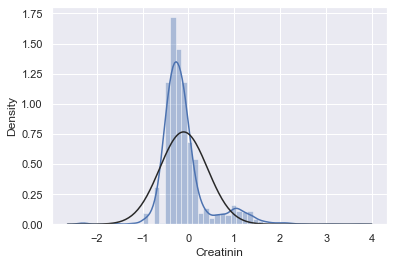

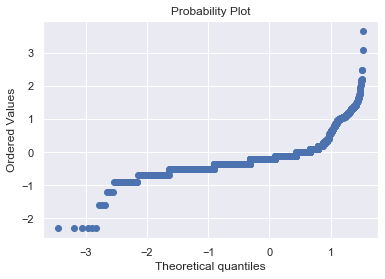

In [59]:
#transformed histogram and normal probability plot
sns.distplot(df_train['Creatinin'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Creatinin'], plot=plt)

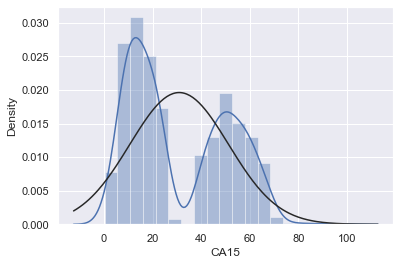

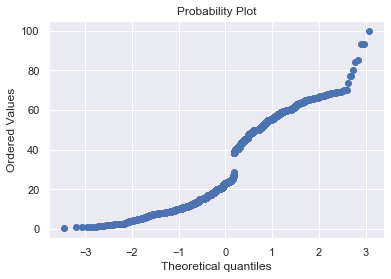

In [60]:
#histogram and normal probability plot
sns.distplot(df_train['CA15'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['CA15'], plot=plt)

In [61]:
#data transformation
df_train['CA15'] = np.log(df_train['CA15'])

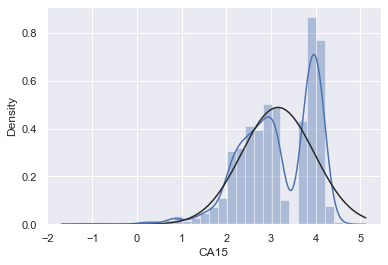

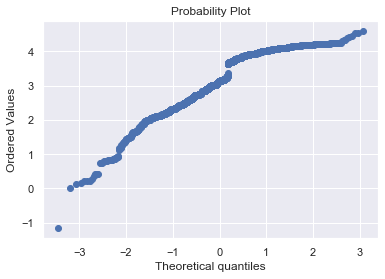

In [62]:
#transformed histogram and normal probability plot
sns.distplot(df_train['CA15'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['CA15'], plot=plt)

### ممكن أكمال الباقي علي كل السمات ووضعها في التوزيع الطبيعي

In [63]:
df_train

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,5.298317,3.135494,-0.223144,3.4,1.0,2.0,1.0,...,3.4,4.60,13.4,500.0,25.0,150.0,145.0,4.50,19.1,0
1,1,53,Sabha,5.991465,3.091042,-0.356675,NaN,9.6,3.0,7.0,...,4.4,5.00,12.5,NaN,15.0,260.0,137.8,4.18,19.1,0
2,1,50,Sabha,6.109248,3.295837,-0.510826,3.5,9.3,11.0,17.0,...,5.1,4.46,12.5,456.0,2.0,169.0,139.2,4.17,16.4,0
3,1,36,Obaree-center,5.703782,2.708050,0.095310,4.2,8.5,13.0,1.0,...,3.1,4.33,13.8,600.0,15.0,138.0,14.0,4.00,1.1,0
4,1,30,Obaree-center,5.843544,0.693147,0.000000,3.0,8.0,7.0,13.0,...,4.2,4.13,1.7,543.0,25.0,154.0,136.4,4.60,17.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1,30,Algatroon,4.248495,3.332205,-0.356675,5.9,9.5,63.0,23.0,...,3.9,5.23,11.3,288.0,15.0,254.0,138.7,4.35,103.6,1
2433,1,47,Sabha,4.584967,3.465736,-0.223144,10.2,8.8,82.0,23.0,...,4.8,4.57,13.2,249.0,12.0,254.0,142.3,4.40,102.7,1
2434,1,43,Sabha,4.330733,2.708050,-0.510826,11.4,8.1,22.0,15.0,...,4.4,4.32,11.1,249.0,8.0,254.0,137.8,4.25,110.2,1
2435,1,60,Sabha,4.787492,3.367296,-0.105361,10.9,8.2,51.0,17.0,...,4.5,4.41,12.9,293.0,13.0,254.0,147.5,3.15,107.5,1


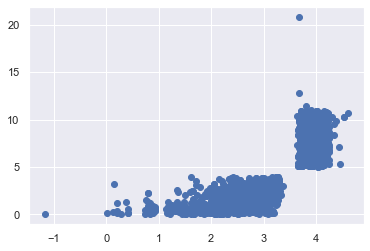

In [64]:
#scatter plot
plt.scatter(df_train['CA15'], df_train['CEA']);

# Last but not the least, dummy variables

Easy mode.

### تقنية الدمي مثل أنكودر ألا أن الاختلاق في أن الأولي تنشي عمود لكل سمة فئوية مع لأخد في عين الأعتبار قيمته

In [65]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)


In [66]:
df_train.shape

(2437, 52)

In [69]:
df_train

,Sex,Age,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS,Adress_ALzentan,Adress_Agdabia,Adress_Alagialt,Adress_Alchate,Adress_Algatroon,Adress_Algofra,Adress_Alzeegan,Adress_Alzwia-Algrbia,Adress_BenGawoad,Adress_Benghazi,Adress_Benwalid,Adress_GaberOan,Adress_Gath,Adress_Godoha,Adress_Graian,Adress_Magdool,Adress_Morzek,Adress_Obaree-center,Adress_OmAlrianb,Adress_Sabha,Adress_Subrath,Adress_Tegee,Adress_Temaciha,Adress_Temcian,Adress_Tragan,Adress_Tripoli,Adress_Wade-atebah,Adress_Zoiwela,Adress_Zwoarha,Adress_sabha
0,1,60,5.298317,3.135494,-0.223144,3.4,1.0,2.0,1.0,124.0,4.235844,8.02,3.4,4.60,13.4,500.0,25.0,150.0,145.0,4.50,19.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,53,5.991465,3.091042,-0.356675,NaN,9.6,3.0,7.0,133.0,3.947776,7.91,4.4,5.00,12.5,NaN,15.0,260.0,137.8,4.18,19.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,50,6.109248,3.295837,-0.510826,3.5,9.3,11.0,17.0,155.0,3.912023,8.74,5.1,4.46,12.5,456.0,2.0,169.0,139.2,4.17,16.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,36,5.703782,2.708050,0.095310,4.2,8.5,13.0,1.0,NaN,3.691626,10.34,3.1,4.33,13.8,600.0,15.0,138.0,14.0,4.00,1.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,30,5.843544,0.693147,0.000000,3.0,8.0,7.0,13.0,125.0,4.214052,7.31,4.2,4.13,1.7,543.0,25.0,154.0,136.4,4.60,17.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1,30,4.248495,3.332205,-0.356675,5.9,9.5,63.0,23.0,234.0,3.044522,1.12,3.9,5.23,11.3,288.0,15.0,254.0,138.7,4.35,103.6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2433,1,47,4.584967,3.465736,-0.223144,10.2,8.8,82.0,23.0,190.0,3.061988,2.02,4.8,4.57,13.2,249.0,12.0,254.0,142.3,4.40,102.7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2434,1,43,4.330733,2.708050,-0.510826,11.4,8.1,22.0,15.0,143.0,2.140066,0.50,4.4,4.32,11.1,249.0,8.0,254.0,137.8,4.25,110.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2435,1,60,4.787492,3.367296,-0.105361,10.9,8.2,51.0,17.0,104.0,NaN,NaN,4.5,4.41,12.9,293.0,13.0,254.0,147.5,3.15,107.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
